In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File paths
train_path = "/content/mnist_test.csv"
test_path  = "/content/mnist_train.csv"

In [ ]:
# Loading the CSV files using Pandas
df_train = pd.read_csv(train_path, header=None, dtype=str)
df_test  = pd.read_csv(test_path, header=None, dtype=str)

In [ ]:
# Initializing the label and pixel wise column names
df_train.columns = ["label"] + [f"pixel{i}" for i in range(784)]
df_test.columns  = ["label"] + [f"pixel{i}" for i in range(784)]

In [ ]:
# Convert to numeric, turn non-numeric into NaN
df_train["label"] = pd.to_numeric(df_train["label"], errors="coerce")
df_test["label"]  = pd.to_numeric(df_test["label"], errors="coerce")

for c in df_train.columns[1:]:
    df_train[c] = pd.to_numeric(df_train[c], errors="coerce")
for c in df_test.columns[1:]:
    df_test[c] = pd.to_numeric(df_test[c], errors="coerce")

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Printing total number of samples
print("Train samples:", df_train.shape[0])
print("Test samples: ", df_test.shape[0])

# Printing feature counts
print("Number of features (pixels):", df_train.shape[1] - 1)

print("\nClass distribution (train):")
print(df_train["label"].value_counts().sort_index())

Train samples: 10001
Test samples:  60001
Number of features (pixels): 784

Class distribution (train):
label
0.0     980
1.0    1135
2.0    1032
3.0    1010
4.0     982
5.0     892
6.0     958
7.0    1028
8.0     974
9.0    1009
Name: count, dtype: int64


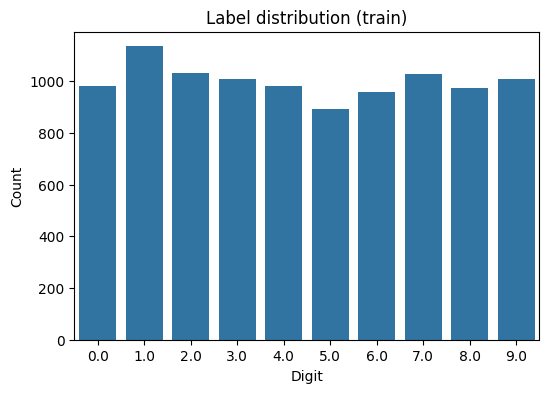

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_train["label"])
plt.title("Label distribution (train)")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [ ]:
print("Any missing in train?", df_train.isnull().values.any())
print("Any missing in test? ", df_test.isnull().values.any())

print("Missing values per column:")
print(df_train.isnull().sum().head(10))

Any missing in train? True
Any missing in test?  True
Missing values per column:
label     1
pixel0    1
pixel1    1
pixel2    1
pixel3    1
pixel4    1
pixel5    1
pixel6    1
pixel7    1
pixel8    1
dtype: int64


In [ ]:
df_train = df_train.dropna()
df_test  = df_test.dropna()

In [ ]:
# Ensuirng missing values are taken care of
print("Any missing in train?", df_train.isnull().values.any())
print("Any missing in test? ", df_test.isnull().values.any())

Any missing in train? False
Any missing in test?  False


In [45]:
y = df_train["label"].values.astype(np.int64)
X = df_train.drop(columns=["label"]).values.astype(np.float32)

# Normalize grayscale pixels from [0, 255] to [0, 1]
X /= 255.0

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 784)
y shape: (10000,)


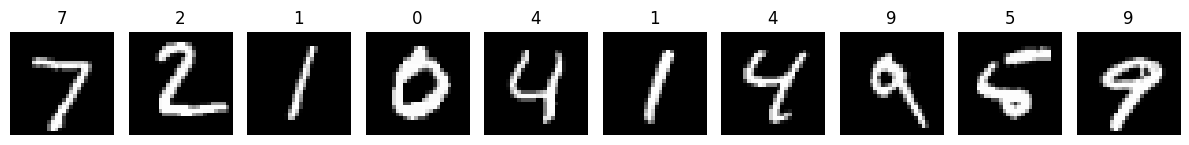

In [46]:
# Visualizing 10 samples
def show_samples(X, y, n=10):
    plt.figure(figsize=(12, 3))
    for i in range(n):
        img = X[i].reshape(28, 28)
        label = y[i]
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(str(label))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(X, y, n=10)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 80/20 split
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (8000, 784) (8000,)
Test:  (2000, 784) (2000,)


In [48]:
from sklearn.decomposition import PCA

# Assuming 50 components
n_components = 50

pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)   # fit on train, transform train
X_test_pca  = pca.transform(X_test)        # transform test with same PCA

print("Explained variance ratio (first few):")
print(pca.explained_variance_ratio_[:10])

print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape: ", X_test_pca.shape)

Explained variance ratio (first few):
[0.10012833 0.07566479 0.06130163 0.05428287 0.05039052 0.04212627
 0.03283434 0.02945638 0.02741809 0.02291395]
X_train_pca shape: (8000, 50)
X_test_pca shape:  (2000, 50)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]
best_k = None
best_acc = 0.0
results_knn = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_knn[k] = acc
    print(f"KNN (k={k}) test accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"\nBest KNN -> k={best_k}, test accuracy={best_acc:.4f}")

KNN (k=1) test accuracy: 0.9535
KNN (k=3) test accuracy: 0.9550
KNN (k=5) test accuracy: 0.9475
KNN (k=7) test accuracy: 0.9430
KNN (k=9) test accuracy: 0.9420

Best KNN -> k=3, test accuracy=0.9550


In [ ]:
from sklearn.svm import SVC

C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1]

best_params_svm = None
best_acc_svm = 0.0

# Use PCA-reduced features if available, else use full X_train/X_test
Xtr_svm = X_train_pca 
Xte_svm = X_test_pca 

for C in C_values:
    for gamma in gamma_values:
        svm_rbf = SVC(kernel="rbf", C=C, gamma=gamma)
        svm_rbf.fit(Xtr_svm, y_train)
        y_pred = svm_rbf.predict(Xte_svm)
        acc = accuracy_score(y_test, y_pred)
        print(f"SVM RBF (C={C}, gamma={gamma}) test accuracy: {acc:.4f}")

        if acc > best_acc_svm:
            best_acc_svm = acc
            best_params_svm = {"kernel": "rbf", "C": C, "gamma": gamma}

print(f"\nBest SVM RBF -> {best_params_svm}, test accuracy={best_acc_svm:.4f}")

SVM RBF (C=0.1, gamma=0.001) test accuracy: 0.8480
SVM RBF (C=0.1, gamma=0.01) test accuracy: 0.9225
SVM RBF (C=0.1, gamma=0.1) test accuracy: 0.7100
SVM RBF (C=1, gamma=0.001) test accuracy: 0.9115
SVM RBF (C=1, gamma=0.01) test accuracy: 0.9545
SVM RBF (C=1, gamma=0.1) test accuracy: 0.9610
SVM RBF (C=10, gamma=0.001) test accuracy: 0.9330
SVM RBF (C=10, gamma=0.01) test accuracy: 0.9685
SVM RBF (C=10, gamma=0.1) test accuracy: 0.9630

Best SVM RBF -> {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}, test accuracy=0.9685


In [51]:
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(Xtr_svm, y_train)
y_pred_linear = svm_linear.predict(Xte_svm)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"SVM Linear (C=1.0) test accuracy: {acc_linear:.4f}")

SVM Linear (C=1.0) test accuracy: 0.9205


In [52]:
from sklearn.tree import DecisionTreeClassifier

max_depth_values = [5, 10, 20, None]
min_samples_split_values = [2, 5, 10]

best_params_dt = None
best_acc_dt = 0.0

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"DT (max_depth={max_depth}, min_samples_split={min_samples_split}) "
              f"test accuracy: {acc:.4f}")

        if acc > best_acc_dt:
            best_acc_dt = acc
            best_params_dt = {
                "max_depth": max_depth,
                "min_samples_split": min_samples_split
            }

print(f"\nBest Decision Tree -> {best_params_dt}, test accuracy={best_acc_dt:.4f}")

DT (max_depth=5, min_samples_split=2) test accuracy: 0.6735
DT (max_depth=5, min_samples_split=5) test accuracy: 0.6735
DT (max_depth=5, min_samples_split=10) test accuracy: 0.6735
DT (max_depth=10, min_samples_split=2) test accuracy: 0.8110
DT (max_depth=10, min_samples_split=5) test accuracy: 0.8105
DT (max_depth=10, min_samples_split=10) test accuracy: 0.8070
DT (max_depth=20, min_samples_split=2) test accuracy: 0.8035
DT (max_depth=20, min_samples_split=5) test accuracy: 0.8090
DT (max_depth=20, min_samples_split=10) test accuracy: 0.8050
DT (max_depth=None, min_samples_split=2) test accuracy: 0.8115
DT (max_depth=None, min_samples_split=5) test accuracy: 0.8115
DT (max_depth=None, min_samples_split=10) test accuracy: 0.8025

Best Decision Tree -> {'max_depth': None, 'min_samples_split': 2}, test accuracy=0.8115


In [53]:
# Best predictions for evaluation
y_pred_knn = knn.predict(X_test)          # best k-NN
y_pred_svm = svm_rbf.predict(Xte_svm)     # best SVM RBF
y_pred_dt  = dt.predict(X_test)           # best Decision Tree

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

models = {
    "KNN": y_pred_knn,
    "SVM RBF": y_pred_svm,
    "Decision Tree": y_pred_dt
}

print("Test Set Accuracies\n")
for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f} ({acc*100:.2f}%)")

Test Set Accuracies

KNN: 0.9420 (94.20%)
SVM RBF: 0.9630 (96.30%)
Decision Tree: 0.8025 (80.25%)


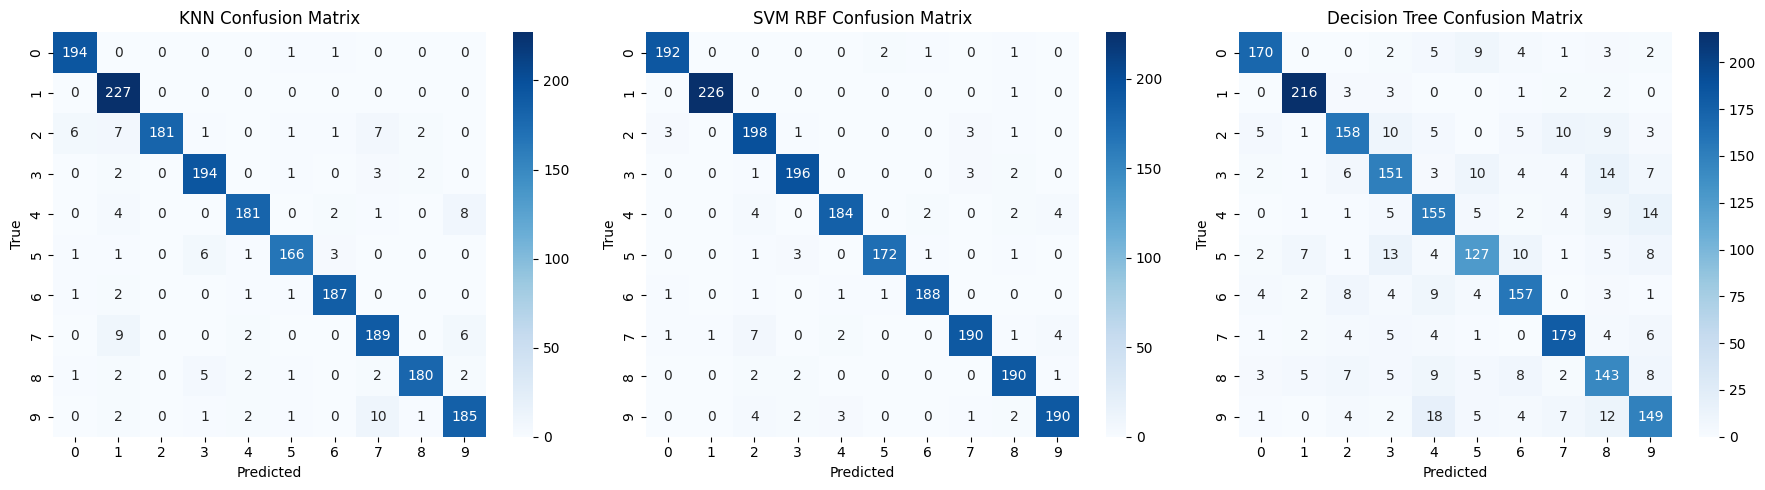

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=range(10), yticklabels=range(10),
                ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

plt.tight_layout()
plt.show()

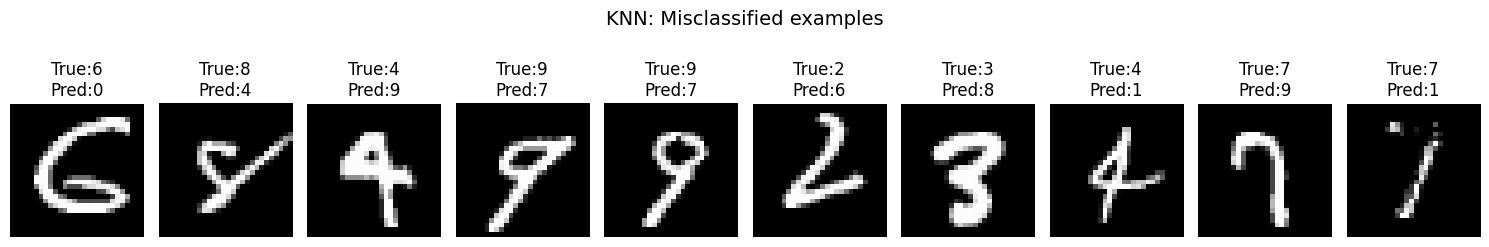

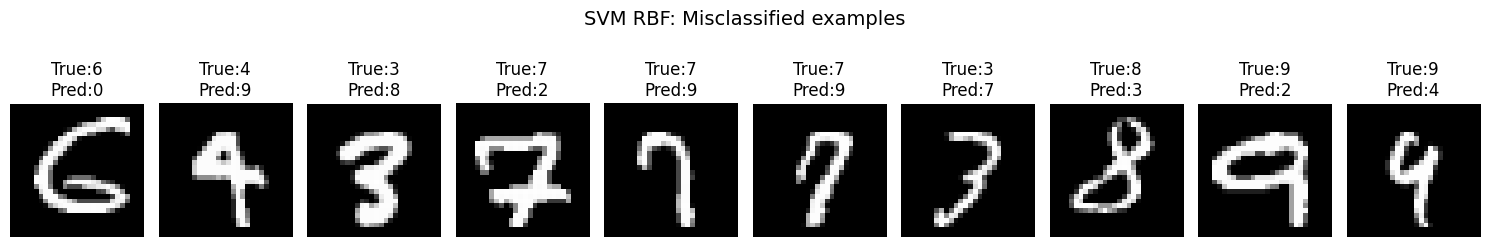

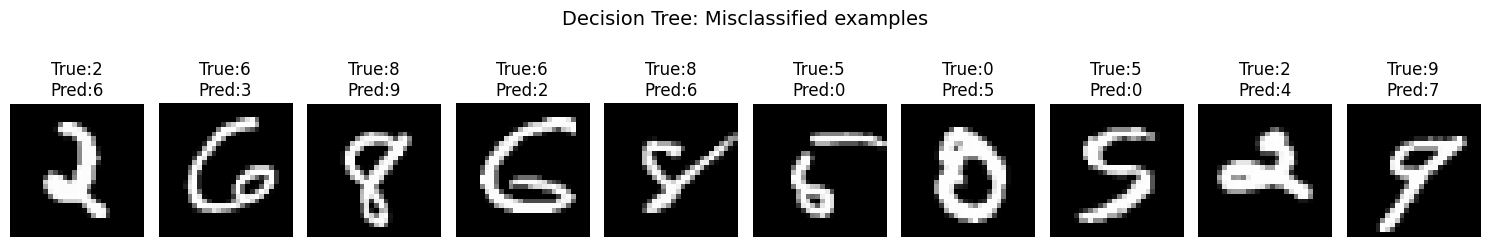

In [58]:
# Return indices of first n misclassified examples
def find_misclassified(y_true, y_pred, X_test, n=10):
    wrong = np.where(y_true != y_pred)[0]
    return wrong[:n]

# Get misclassified indices for each model
wrong_knn = find_misclassified(y_test, y_pred_knn, X_test, 10)
wrong_svm = find_misclassified(y_test, y_pred_svm, X_test, 10)
wrong_dt  = find_misclassified(y_test, y_pred_dt, X_test, 10)

def show_misclassified(X_wrong, y_true_wrong, y_pred_wrong, model_name, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        idx = X_wrong[i]
        img = X_test[idx].reshape(28, 28)
        true = y_test[idx]
        pred = y_pred_wrong[i]

        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"True:{true}\nPred:{pred}", fontsize=12)
        plt.axis("off")
    plt.suptitle(f"{model_name}: Misclassified examples", fontsize=14)
    plt.tight_layout()
    plt.show()

# Visualize for each model
show_misclassified(wrong_knn, y_test[wrong_knn], y_pred_knn[wrong_knn], "KNN")
show_misclassified(wrong_svm, y_test[wrong_svm], y_pred_svm[wrong_svm], "SVM RBF")
show_misclassified(wrong_dt , y_test[wrong_dt],  y_pred_dt[wrong_dt],  "Decision Tree")

In [59]:
from sklearn.ensemble import VotingClassifier

# Use your best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
svm = SVC(kernel="rbf", C=best_params_svm["C"], gamma=best_params_svm["gamma"], probability=True)
dt  = DecisionTreeClassifier(max_depth=best_params_dt["max_depth"],
                            min_samples_split=best_params_dt["min_samples_split"],
                            random_state=42)

# Hard voting: majority vote
ensemble_hard = VotingClassifier(
    estimators=[("knn", knn), ("svm", svm), ("dt", dt)],
    voting="hard"
)

# Soft voting: average probabilities (requires probability=True in SVM)
ensemble_soft = VotingClassifier(
    estimators=[("knn", knn), ("svm", svm), ("dt", dt)],
    voting="soft"
)

# Train and evaluate
ensemble_hard.fit(X_train, y_train)
y_pred_hard = ensemble_hard.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)

ensemble_soft.fit(X_train, y_train)
y_pred_soft = ensemble_soft.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("Individual accuracies:")
print(f"KNN:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"SVM:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"DT:   {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\nEnsemble -> Hard: {acc_hard:.4f}, Soft: {acc_soft:.4f}")

Individual accuracies:
KNN:  0.9420
SVM:  0.9630
DT:   0.8025

Ensemble -> Hard: 0.9600, Soft: 0.9610


In [60]:
print("PCA Effect (50 components)\n")

# KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
acc_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

# SVM with PCA
svm_pca = SVC(kernel="rbf", C=best_params_svm["C"], gamma=best_params_svm["gamma"])
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
acc_svm_pca = accuracy_score(y_test, y_pred_svm_pca)

print("KNN (784D):", accuracy_score(y_test, y_pred_knn), "→ PCA (50D):", acc_knn_pca)
print("SVM (784D):", accuracy_score(y_test, y_pred_svm), "→ PCA (50D):", acc_svm_pca)

print(f"\nPCA explained variance: {pca.explained_variance_ratio_.sum():.1%}")

PCA Effect (50 components)

KNN (784D): 0.942 → PCA (50D): 0.9635
SVM (784D): 0.963 → PCA (50D): 0.9685

PCA explained variance: 83.1%


In [61]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["KNN", "SVM", "Ensemble Soft"],
    "784D": [accuracy_score(y_test, y_pred_knn),
             accuracy_score(y_test, y_pred_svm),
             acc_soft],
    "PCA-50D": [acc_knn_pca, acc_svm_pca, np.nan]
})
print(comparison.round(4))

           Model   784D  PCA-50D
0            KNN  0.942   0.9635
1            SVM  0.963   0.9685
2  Ensemble Soft  0.961      NaN
